In [24]:
# Creating a function that will create the goal state based
# on the number of dimensions that the user gives it.
# Arguments:
# N: The number of rows and columns for the square matrix.
def puzzle(N):
    # Creating an matrix of dimension NxN with all 0's
    mat = [N*[0] for i in range(N)]
    # Iterating over all rows
    for r in range(N):
        # For each row, iterating over each column
        for c in range(N):
            #print(r,c)
            # Assigning the corresponding value of the puzzle
            # by using the following formula.
            mat[r][c] = N*r + c%N + 1
            
    # Based on the formula used for each element above, the [N,N] position
    # will contain (N+1) but we want it to be 0 to represent an empty space
    mat[N-1][N-1] = 0
    
    return mat

In [25]:
# This function creates a dictionary with the correct indices for each of 
# the tiles in the given state.
def mat2dict(mat):
    # Defining an intial empty dictiory
    goal_dict = {}
    # The dimension of mat
    n = len(mat)
    # Iterating over each element in the matrix
    for i in range(n):
        for j in range(n):
            # The value of the i,j tile
            tile = mat[i][j]
            #print(tile)
            # For each tile, assign its corresponding indices
            goal_dict[tile] = [i,j]
    
    return goal_dict

In [26]:
def mat2tpl(mat):
    """Convert 2-D array to tuple of tuples"""
    return tuple([tuple(x) for x in mat])

In [27]:
# This function determines the next possible moves based on the 
# current state in the search.
def next_move(crnt):
    # The dimension of crnt
    N = len(crnt)
    # Creating a dictionary of pieces and their corresponding indices
    # so that we can identify the indices of 0, the blank space.
    crnt_dict = mat2dict(crnt)
    # The indices of the blank space 0
    blank_ind = tuple(crnt_dict[0])
    # Creting an empty list to keep track of the possible moves 
    # from the blank space
    moves_from = []
    
    #print(blank_ind)
    
    # If the row index doesn't equal 0 (the first row), we can make a move from the top
    if blank_ind[0] != 0: moves_from.append('T')
    # If the row index doesn't equal N-1 (the last row), we can make a move from the bottom
    if blank_ind[0] != N-1: moves_from.append('B')
    # If the column index doesn't equal 0 (the first column), we can make a move from the left
    if blank_ind[1] != 0: moves_from.append('L')
    # If the column index doesn't equal N-1 (the last column), we can make a move from the right
    if blank_ind[1] != N-1: moves_from.append('R')
    
    #print(moves_from)
    
    # Creating an empty list to keep track of the indices that the blank space 
    # can move to
    moves = []
        
    # Determining the indices based on the possible moves in the list moves_from
    for d in moves_from:
        # If we can make a move from the top, then the row index of the blank space
        # decreases by 1 and the column index stays the same.
        if d == 'T': moves.append(((blank_ind[0]-1,blank_ind[1]), blank_ind))
        # If we can make a move from the bottom, then the row index of the blank space
        # increases by 1 and the column index stays the same. 
        elif d == 'B': moves.append(((blank_ind[0]+1,blank_ind[1]), blank_ind))
        # If we can make a move from the left, then the column index of the blank space
        # decreases by 1 and the row index stays the same. 
        elif d == 'L': moves.append(((blank_ind[0],blank_ind[1]-1), blank_ind))
        # If we can make a move from the right, then the column index of the blank space
        # increases by 1 and the row index stays the same. 
        elif d == 'R': moves.append(((blank_ind[0],blank_ind[1]+1), blank_ind))
    
    return moves

In [28]:
import copy
"""
This function creates the next states (child nodes) from the given
current state. 
Arguments - 
crnt: A matrix of the current state in the search.
move: A move from the current state.
"""
def get_next_state(crnt, move):
    # Creating a deep copy of the current state so that I can
    # update the child node properly without modifying crnt.
    child = copy.deepcopy(crnt)
    # Switching the values of the blank space in the current state 
    # with the value that we are moving.
    child[move[0][0]][move[0][1]] = crnt[move[1][0]][move[1][1]] # the new blank space
    child[move[1][0]][move[1][1]] = crnt[move[0][0]][move[0][1]] # the moved piece
    
    return child

In [29]:
def h_0(crnt, goal):
    return 0

In [30]:
def h_misplace(crnt, goal):
    # number of rows and columns in crnt
    n = len(crnt)
    # Counter for the number of misplaced tiles
    misplace = 0
    # iterating over all elements in the crnt and goal matrices
    for i in range(n):
        for j in range(n):
            #print(crnt[i][j], goal[i][j])
            # Checking to see if the i,j element in crnt state 
            # is in the right place or not. Including a condition
            # that the misplaced element can't equal 0 since this
            # heuristic doesn't consider it as misplaced.
            if crnt[i][j] != goal[i][j] and crnt[i][j] != 0:
                # Each time we have a misplaced tile, misplace increases by 1
                misplace += 1
    return misplace

In [31]:
def h_manhatt(crnt, goal):
    # Dimension of crnt and goal
    n = len(crnt)
    # Creating a variable for the manhattan distance
    manhatt_dist = 0
    # Iterating over all elements in the matrix
    for i in range(n):
        for j in range(n):
            # Don't want to calculate manhattan distance for tile 0
            if crnt[i][j] != 0:
                # The value of the i,j tile in crnt
                tile = crnt[i][j]
                # The correct indices based on the goal state
                # for the value tile
                crct_ind = mat2dict(goal)[tile]
                # Calculating the manhattan distance
                manhatt_dist += abs(i - crct_ind[0]) + abs(j - crct_ind[1])
                #print(manhatt_dist)
    return manhatt_dist

In [32]:
# Function that determines whether or not the search has 
# reached the goal state given the current state.
# Arguments:
# crnt: The current state in the search.
# goal: the goal state of the search.
# Return:
# 
def goal_state(crnt, goal):
    # Compares the crnt and goal matrices to determine if they 
    # are equivalent.
    return(crnt == goal)

In [33]:
import heapq as heap

# Creating a function for the A* algorithm that will work for 
# uniform cost search, the misplaced tile heuristic and the 
# manhatten distance heuristic.
# The arguments for the function are:
# goal_mat: The goal state for the puzzle
# start_mat: The puzzle that we are starting the search with.
# g: A cost function where the default is set to 1.
# h: A heuristic function
def astar(goal_mat, start_mat, h, g = 1):
    # At the beginning of the search, first check whether or not
    # the start_mat is the goal state 
    if goal_state(start_mat, goal_mat) == True:
        return {"cost": 0, "moves": [], "depth": 0, "nodes_exp": 0} # not sure what to return yet
    
    # Initializing the list that will contain the priorirty queue of all the states
    # where each state will have a tuple (cost, count, current state, moves)
    pq = []
    # Initializing a count variable that will be used for comparison
    # in pq in the case that the costs of two states are equivalent.
    count = 0
    # Pushing start_mat to the heap. Assigning a cost of 0 to the initial state
    heap.heappush(pq, (0, count, start_mat, []))
    
    # Initializing the dictionary that will keep track of each nodes cost and update
    # as the node is revisited. This will make sure that we don't revisit a node with higher cost.
    add_dict = {}
    
    # Keep searching until pq is an empty list
    while len(pq) != 0:
        # Popping off the node in the priority queue and assigning 
        # variables to each of the components in the tuple which will be used throughout
        crnt_cost, _, crnt_state, crnt_mvs = heap.heappop(pq)
        #print(crnt_mvs)
        # At each iteration check to see if the prev_state is the goal state or not 
        #print(mat2dict(crnt_state)[0])
        if goal_state(crnt_state, goal_mat):
            # Creating a dictionary that will keep track of the cost, the moves from the initial state to 
            # goal state, the depth (length of moves list), and the number of nodes expanded (length of add_dict)
            otpt = {"cost": crnt_cost, "moves": crnt_mvs, "depth": len(crnt_mvs), "nodes_exp": len(add_dict)}
            return otpt 
        
        # In order to not repeat states with higher cost, adding a condition here
        # to check whether or not the crnt_cost is greater than the cost in add_dict
        # which always contains the minimum cost. If this is true don't expand the current 
        # node and go back to the beginning of the while loop.
        if mat2tpl(crnt_state) in add_dict and crnt_cost > add_dict[mat2tpl(crnt_state)]:
            #print("I have reached an added node with higher cost")
            continue
        
#         print(crnt_state)
        # Adding a stopping condition for count just in case
        # the search grows too large.
        if count > 10000000:
            return "I have been searching for too long"
        
        # Find the possible moves from the current state
        moves = next_move(crnt_state)
#         print(moves)
        #print(moves)
        # For each move in moves, find all the child nodes of the current state.
        for mv in moves:
            child = get_next_state(crnt_state, mv)
            # cost of the child node which includes the cost(1 unit of cost to get from 
            # one node to another) of all the previous nodes. To get the cost of all the previous
            # nodes, we use the length of crnt_mvs which contains all the moves so far.
            child_cost = g + len(crnt_mvs) + h(child, goal_mat) 
            # TODO: Need to include some sort of code here to account for the visited
            # nodes
            
            # At each move, if the child node has already been visited, 
            # we want to check if the cost of the child node is smaller than previously 
            # and update it in the dictionary
            if mat2tpl(child) not in add_dict or child_cost < add_dict[mat2tpl(child)]:
                add_dict[mat2tpl(child)] = child_cost
                # count increases by 1 for each child node
                count += 1
            
                #print(mv)
                # Pushing the child node into the heap making sure to include
                # the crnt_mvs to mv so that later I can recreate the path to the goal state.
                heap.heappush(pq, (child_cost, count, child, crnt_mvs+[mv]))
                                                                            
    # print(count)
    return       

In [34]:
# Testing the astar function where the initial state is the goal state
#print(astar(goal_mat = puzzle(3), start_mat = puzzle(3), h = h_0))

# Testing astar where the initial state is simple
st_1 = [[1,2,3],[4,5,6],[7,0,8]]
#print(astar(goal_mat = puzzle(3), start_mat = init_state, h = h_0))

# Depth of 0
d_0 = [[1,2,3],
       [4,5,6],
       [7,8,0]]

# Depth of 2
d_2 = [[1,2,3],
       [4,5,6],
       [0,7,8]]

# Depth of 4
d_4 = [[1,2,3],
       [5,0,6],
       [4,7,8]]

# Depth of 8
d_8 = [[1,3,6],
       [5,0,2],
       [4,7,8]]

# Depth of 12
d_12 = [[1,3,6],
        [5,0,7],
        [4,8,2]]

# Depth of 16
d_16 = [[1,6,7],
        [5,0,3],
        [4,8,2]]

# Depth of 20
d_20 = [[7,1,2],
        [4,8,5],
        [6,3,0]]

# Depth of 24
d_24 = [[0, 7, 2],
        [4, 6, 1],
        [3, 5, 8]]

# Creating a list of all the matrices above
init_states = [d_0, d_2, d_4, d_8, d_12, d_16, d_20, d_24]
init_states[1]

[[1, 2, 3], [4, 5, 6], [0, 7, 8]]

In [ ]:
# Using h_0
h_fxns = [h_0, h_misplace, h_manhatt]
for j in range(len(init_states)):
    for i in range(3):
        print(astar(goal_mat = puzzle(3), start_mat = init_states[j], h = h_fxns[i])['depth'])
# Using h_misplace
#astar(goal_mat = puzzle(3), start_mat = d_0, h = h_misplace)
# Using h_manhatt
#astar(goal_mat = puzzle(3), start_mat = d_0, h = h_manhatt)

In [18]:
from datetime import datetime
# Testing the astar algorithm for a 15 puzzle
fifteen_hard = [[1,3,4,5],[8,2,6,10],[9,12,11,7],[13,15,14,0]]

fifteen_easy = [[1,2,3,4],[6,7,5,8],[9,10,11,12],[13,14,15,0]]

now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)
start = time.time()
print(astar(goal_mat = puzzle(4), start_mat = fifteen_hard, h = h_manhatt))
end = time.time()
print(end-start)

Current Time = 19:10:13
0
10000
20000
30000
40000
50000
70000
80000


KeyboardInterrupt: 

In [35]:
import time 
def calc_stats(states, goal, h_fxn):
    nodes_exp = [0 for i in range(len(states))]
    run_time = [0 for i in range(len(states))]
    for i in range(len(states)):
        start = time.time()
        otpt = astar(goal, states[i], h_fxn)['nodes_exp']
        end = time.time()
        nodes_exp[i] = otpt
        run_time[i] = end - start
    
    return (nodes_exp, run_time)

In [36]:
# Nodes expanded for each depth using h_0, h_misplace, and h_manhatt 
stats_h0 = calc_stats(init_states, puzzle(3), h_0)
stats_hmisplace = calc_stats(init_states, puzzle(3), h_misplace)
stats_hmanhatt = calc_stats(init_states, puzzle(3), h_manhatt)

In [40]:
import matplotlib.pyplot as plt

depth = [0,2,4,8,12,16,20,24]
heur_fxns = [h_0, h_misplace, h_manhatt]

def print_plots(depth_list, states, N, h_fxns):
    # Calculates the number of nodes expanded and running time
    # for each of the depths using the three heuristic functions.
    stats_h0 = calc_stats(init_states, puzzle(N), h_fxns[0])
    stats_hmisplace = calc_stats(init_states, puzzle(N), h_fxns[1])
    stats_hmanhatt = calc_stats(init_states, puzzle(N), h_fxns[2]) 
    
    # Creating plot of depth vs. expanded nodes for each of the three
    # heuristic functions
    plt.plot(depth, stats_h0[0])
    plt.plot(depth, stats_hmisplace[0])
    plt.plot(depth, stats_hmanhatt[0])
    plt.show()
    
    # Creating plot of depth vs. running time for each of the three
    # heuristic functions
    plt.plot(depth, stats_h0[1])
    plt.plot(depth, stats_hmisplace[1])
    plt.plot(depth, stats_hmanhatt[1])
    plt.show()
    
    
    



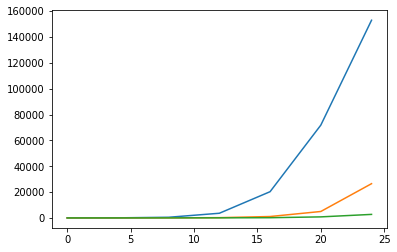

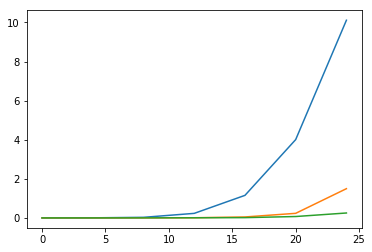

In [41]:
print_plots(depth, init_states, 3, heur_fxns)

In [ ]:
stats_hmisplace

In [ ]:
stats_hmanhatt

In [ ]:
calc_stats(init_states, puzzle(3), h_manhatt)

In [ ]:
def print_moves():
    '''
    Prints the sequence of moves from the initial state to 
    the goal state.
    
    '''

In [ ]:
# Creating a user interface so that the user can enter 
# their own initial state for the puzzle.
import math
MAX_SIZE = 100

def main():
    # TODO: Right now it fails if user make mistakes
    # Check size to be an integer square - 1, use try except on rows input
    square_less_1 = [x**2-1 for x in range(2, 11, 1)]
    size = int(input("This is an N-puzzle solver. Please choose size of game " \
                     f"(can only be N^2-1, e.g. {square_less_1}) no larger than {MAX_SIZE}: "))
    if size > MAX_SIZE:
        print("Size is too large, please try again")
        return
    if size not in square_less_1:
        print('Size game entered is not an integer square - 1, please try again')
        return
    N = int(math.sqrt(size+1))
    puzzle_type = input("Press 1 to create your own puzzle or 2 for a default puzzle:")
    if puzzle_type == '1':
        print("When entering your puzzle, make sure to enter 0 for the blank space and use spaces between numbers:")
        # Creating an empty NxN matrix for the user to create the initial state
        try:
            mat = [N*[0] for i in range(N)]
            # Iterating over each row in the matrix
            for i in range(N):
                mat[i] = input(f"Enter row {str(i)}: ")
            #print(mat)
            # Since the input the user gives for the puzzle is a string,
            # we need to convert the elements of this puzzle to integers.
            for j in range(N):
                splt_row = mat[j].split()
                mat[j] = [int(splt_row[k]) for k in range(N)]
#                 print(mat[j])
        except:
            print("Please pay attention to the format required")
            return
    if puzzle_type == '2':
        pass
        # call function that will run search with default puzzle. 
        # maybe give options for the difficulty of default puzzle.
        
    print(f"This is the starting state:")
    for i in range(N):
        print(mat[i])
        
    # Ask user for:
    # Algorithm
    heur_fxn = input("Please choose your heuristic function, enter (1) Uniform Cost, (2) Misplaced Tile, (3) Manhattan Distance: ")
    # Would you like a print of the best sequence of moves y/n - into PRINT_MOVES
    seq_mov = input("Would you like a print out of the best sequence of moves? Enter y/n: ")
    
    # If the user wants to see the best sequence of moves, then call function print_moves
    if seq_move == 'y':
        print_moves()
    # Would you like a full trace of the algorithm? NOTE: this could be pretty long - into PRINT_TRACE